# Coding II -- Day 2 -- Plotting and Matplotlib
-- Giorgio Sarro -- gmsarro@uchicago.edu

**NOTE**: If you're following along to a live lecture, don't worry about reading the text in this notebook. I'll summarize the text as we move forward, and it's there in case you need to go back and refresh your memory at a later time.

# Section 1: Getting Started

Today we're going to learn how to plot in Python using Matplotlib. There are faster ways of creating figures but Matplotlib is probably the best for publication-quality figures. These tools are also useful for presentations. 


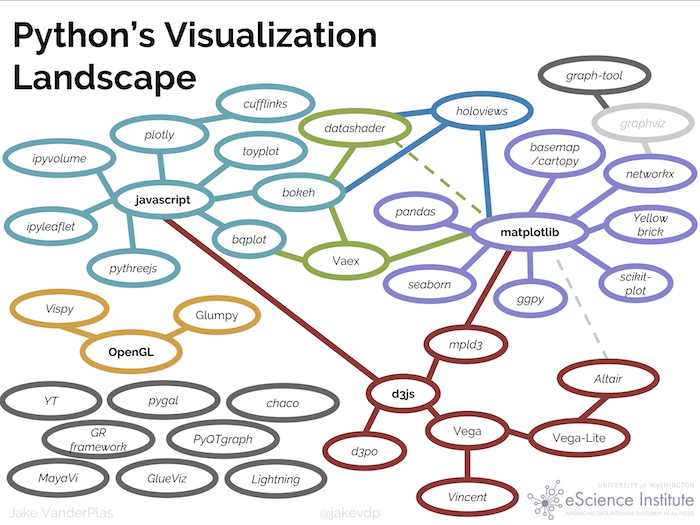

## 1.1 Import required packages

In [ ]:
import numpy as np
import pandas as pd  

# Matplotlib
import matplotlib.pylab as plt         


# Exploratory plots and Explanatory plots

**The core concept for today** is that visulazations in data analysis fall into two categories: plots that help you understand your data, and plots that help your reader understand your story. Exploration always comes before explaning. 

"In turning over 100 rocks, you may find 1 or 2 precious gemstones."  

**Warning**: don't think that because a plot is more complex that it is inherently better. The opposite is more often true. Showing your result in the simplest way possible will make the figure easier to interpret and more powerful. 

# Section 2: 1D plots 

This will probably be a review for many of you, but refreshing things does not hurt.

Let's create two 1D dataset:

In [ ]:
one_D_a = np.cos(np.linspace(0,15,200))
one_D_b = np.sin(np.linspace(0,15,200))

x_axis = np.linspace(0,15,200)

Even without plotting you should be able to guess what the array will look like when plotted.

To confirm I will do a "quick" plot:

In [ ]:
plt.plot(one_D_a)
plt.plot(one_D_b)

As you can see, automatically matplotlib chooses to plot the two arrays on the same graph, with different colors, and automatic axes. 

This is great for a quick visualization of your own data, but not to show other people. 

Let's first add the **title** of the figure and of the axis:

In [ ]:
plt.plot(x_axis,one_D_a)
plt.plot(x_axis, one_D_b)

plt.title('My Plot')
plt.xlabel('Input')
plt.ylabel('Output')

Now let's add a **legend and choose the color**:

In [ ]:
plt.plot(x_axis,one_D_a,label='Cosine Line', color= 'blue')
plt.plot(x_axis,one_D_b,label='Sine Line', color= 'red')

plt.title('My Plot')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()

For a presentation or a paper, the automatic format size might not be desirable. We can make the figure bigger!

In [ ]:
plt.figure(figsize=(15,10))  

plt.plot(x_axis,one_D_a,label='Cosine Line', color= 'blue', linewidth= 10)
plt.plot(x_axis,one_D_b,label='Sine Line', color= 'red', linewidth= 10)


plt.title('My Plot', fontsize= 25,fontweight="bold")
plt.xlabel('Input', fontsize= 20)
plt.ylabel('Output', fontsize= 20)

plt.legend(prop={'size': 16})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()  #Always good to add, especially when plotting multiple things 

## 2.1 Scatter Plots

For those of you that will take Statistics for Research, you will dig deeper into the relationship between two quantities, but a quick way to do it in Python is through scatterplot. 

Scaterplot practially puts the dots, without connecting them, making it easy to understand the relationship between two variables without taking into consideration the order in which the arrays are given. 

The relation between our Sine and Cosine curve can be shown:

In [ ]:
plt.figure(figsize=(15,10))  

plt.scatter(one_D_a,one_D_b, marker='o', color= 'blue')


plt.title('The Unit Circle', fontsize= 25,fontweight="bold")
plt.xlabel('Cosine', fontsize= 20)
plt.ylabel('Sine', fontsize= 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

Many cool features can be added, depending on what one wants to plot

In [ ]:
plt.figure(figsize=(15,10))  

plt.scatter(one_D_a,one_D_b,s=x_axis,  marker='o', color= 'blue')

plt.scatter(one_D_a,one_D_b-one_D_a, s=one_D_a**2*40, marker='^', color= 'orange')

plt.scatter(one_D_a*one_D_b,one_D_b, s=one_D_b**2*60, marker='p', color= 'red')

plt.title('Trigonometry Circles', fontsize= 25,fontweight="bold")
plt.xlabel('First Array', fontsize= 20)
plt.ylabel('Seond Array', fontsize= 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

We can also mix the normal plot with scatterplot on the same figure if needed:

In [ ]:
plt.figure(figsize=(15,10))  

plt.plot(x_axis,one_D_a,label='Cosine Line', color= 'blue', linewidth= 10)
plt.plot(x_axis,one_D_b,label='Sine Line', color= 'red', linewidth= 10)

partial_trig = np.where(one_D_b>one_D_a)
partial_trig_result= one_D_b[partial_trig]

plt.scatter(partial_trig[0]*15/200,partial_trig_result, marker='p', color= 'orange', s=50, zorder=10)

plt.title('My Plot', fontsize= 25,fontweight="bold")
plt.xlabel('Input', fontsize= 20)
plt.ylabel('Output', fontsize= 20)

plt.legend(prop={'size': 16})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

### First Check

Plot the sine line in black, and add red dots where the values are positive, and blue triangles where the line is negative.

In [367]:
plt.figure(figsize=(15,10))  

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

## 2.2 Subplots

Often in research there is a need to compare information side by side, or to put different graphs near eachother. 
Also, many papers make you pay each figure, so putting multiple graphs into one can be economically convenient.

Thankfully, Matplotlib has the solution with subpolots.

Most commands are identical to what we just explored with one plot, so when you learn something in one plot it can be applied to multiple subplots easly. The same can be done when we will add multiple dimentions (and you will do it for me as a check-in)

**Takeways:** 

- Set the coordinates of where you want what to be plotted [0,0];[0,1]... (If there is only one column then coordinates are set with only one number [0],[1],..)

- A few things change ".title" became ".set_title", same with the lables.

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(30,42))  #How many rows and columns
fig.subplots_adjust(wspace=0.2,hspace=0.2) #Set the Space between subplots

axs[0, 0].plot(x_axis,one_D_a,label='Cosine Line', color= 'blue', linewidth= 10)
axs[0, 0].plot(x_axis,one_D_b,label='Sine Line', color= 'red', linewidth= 10)

axs[0, 0].set_title('My Plot', fontsize= 25,fontweight="bold")
axs[0, 0].set_xlabel('Input', fontsize= 20)
axs[0, 0].set_ylabel('Output', fontsize= 20)

axs[0, 0].legend(prop={'size': 16})

axs[0, 0].tick_params(labelsize=20)


I will now fill the remaining subplots

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(30,42))  #How many rows and columns
fig.subplots_adjust(wspace=0.2,hspace=0.2) #Set the Space between subplots

axs[0, 0].plot(x_axis,one_D_a,label='Cosine Line', color= 'blue', linewidth= 10)
axs[0, 0].plot(x_axis,one_D_b,label='Sine Line', color= 'red', linewidth= 10)
axs[0, 0].set_title('My Plot', fontsize= 25,fontweight="bold")
axs[0, 0].set_xlabel('Input', fontsize= 20)
axs[0, 0].set_ylabel('Output', fontsize= 20)
axs[0, 0].legend(prop={'size': 16})
axs[0, 0].tick_params(labelsize=20)

axs[0, 1].plot(x_axis,one_D_a*-1,label='-Cosine Line', color= 'orange', linewidth= 10)
axs[0, 1].plot(x_axis,one_D_b,label='Sine Line', color= 'red', linewidth= 10)
axs[0, 1].set_title('My Plot New', fontsize= 25,fontweight="bold")
axs[0, 1].set_xlabel('Input', fontsize= 20)
axs[0, 1].set_ylabel('Output', fontsize= 20)
axs[0, 1].legend(prop={'size': 16})
axs[0, 1].tick_params(labelsize=20)

axs[1, 0].plot(x_axis,one_D_a,label='Cosine Line', color= 'blue', linewidth= 10)
axs[1, 0].plot(x_axis,one_D_b*one_D_b,label='Sine Squared', color= 'green', linewidth= 10)
axs[1, 0].set_title('My Plot New New', fontsize= 25,fontweight="bold")
axs[1, 0].set_xlabel('Input', fontsize= 20)
axs[1, 0].set_ylabel('Output', fontsize= 20)
axs[1, 0].legend(prop={'size': 16})
axs[1, 0].tick_params(labelsize=20)

axs[1, 1].plot(x_axis,one_D_a*one_D_a,label='Cosine Squared', color= 'magenta', linewidth= 10)
axs[1, 1].plot(x_axis,one_D_b*one_D_b,label='Sine Squared', color= 'green', linewidth= 10)
axs[1, 1].set_title('Squared Plot', fontsize= 25,fontweight="bold")
axs[1, 1].set_xlabel('Input', fontsize= 20)
axs[1, 1].set_ylabel('Output', fontsize= 20)
axs[1, 1].legend(prop={'size': 16})
axs[1, 1].tick_params(labelsize=20)

plt.show()

Now, that are a few problems that are evident:

- There is a lot of repetition in the name and ticks of the axis

- The y-axis is not the same in all plots, how can you compare properly?

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(30,42), sharex=True, sharey= True) 
fig.subplots_adjust(wspace=0.2,hspace=0.2) 

axs[0, 0].plot(x_axis,one_D_a,label='Cosine Line', color= 'blue', linewidth= 10)
axs[0, 0].plot(x_axis,one_D_b,label='Sine Line', color= 'red', linewidth= 10)
axs[0, 0].set_title('My Plot', fontsize= 25,fontweight="bold")
axs[0, 0].set_ylabel('Output', fontsize= 20)
axs[0, 0].legend(prop={'size': 16})
axs[0, 0].tick_params(labelsize=20)

axs[0, 1].plot(x_axis,one_D_a*-1,label='-Cosine Line', color= 'orange', linewidth= 10)
axs[0, 1].plot(x_axis,one_D_b,label='Sine Line', color= 'red', linewidth= 10)
axs[0, 1].set_title('My Plot New', fontsize= 25,fontweight="bold")
axs[0, 1].legend(prop={'size': 16})
axs[0, 1].tick_params(labelsize=20)

axs[1, 0].plot(x_axis,one_D_a,label='Cosine Line', color= 'blue', linewidth= 10)
axs[1, 0].plot(x_axis,one_D_b*one_D_b,label='Sine Squared', color= 'green', linewidth= 10)
axs[1, 0].set_title('My Plot New New', fontsize= 25,fontweight="bold")
axs[1, 0].set_xlabel('Input', fontsize= 20)
axs[1, 0].set_ylabel('Output', fontsize= 20)
axs[1, 0].legend(prop={'size': 16})
axs[1, 0].tick_params(labelsize=20)

axs[1, 1].plot(x_axis,one_D_a*one_D_a,label='Cosine Squared', color= 'magenta', linewidth= 10)
axs[1, 1].plot(x_axis,one_D_b*one_D_b,label='Sine Squared', color= 'green', linewidth= 10)
axs[1, 1].set_title('Squared Plot', fontsize= 25,fontweight="bold")
axs[1, 1].set_xlabel('Input', fontsize= 20)
axs[1, 1].legend(prop={'size': 16})
axs[1, 1].tick_params(labelsize=20)

#axs[1, 1].set_yticks(range(-1,1)) #This is another way of forcing it without the "sharey" function

plt.show()

# 3.1 2D Plots

Often in research, and especially geophysical research, datasets are in multiple dimentions, starting with 2D, like the surface of our planet. 
Python has several ways that can help us visualize 2D datasets.

I will start with creating a 2D dataset, and we will explore it with Python's tools as we go along. 

In [ ]:
two_D_data = np.zeros((120,120), float)
u_data = np.zeros((120,120), float)
v_data = np.zeros((120,120), float)

for x in range(120):
    for y in range(120):
        two_D_data[x,y]= (np.exp(-np.sqrt(((60-x)**2+(60-y)**2))))**(1/6)*7
        u_data[x,y]= ((np.exp(-np.sqrt(((60-x)**2+(60-y)**2))))**(1/6)*700)*(np.exp(-(60-x)**2))**(1/6)*(-60+y)
        v_data[x,y]= ((np.exp(-np.sqrt(((60-x)**2+(60-y)**2))))**(1/6)*700)*(np.exp(-(60-y)**2))**(1/6)*(60-x)


There are two common ways of plotting 2D dataset with Matplotlib:
 - "Imshow" which shows every pixel
 - "Contourf" which selects levels to color (or filled contours)

This is what our newly created dataset looks like with the two methods on quick plot.

In [ ]:
plt.imshow(two_D_data)

In [ ]:
plt.contourf(two_D_data)

There are a few evident differences to remember:
  - "Imshow" takes the shape of the dataset (in this case a square), while "Contourf" always takes the same rectangular shape, no matter the actual x to y ratio. 
  - In "Imshow" the y-axis is in descending order, flipoping the the image. It is not so clear here because I am plotting something symmetric. (it can be fixed by adding plt.gca().invert_yaxis() )

One important feature to add is the colorbar.

In [ ]:
C= plt.imshow(two_D_data)
plt.colorbar(C)

As we did with the 1D plots, we can add many useful features to make the plot ok for presentations, such as titles, changing colors and size.

To choose a colorbar color, it is always good to consult this page: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
plt.figure(figsize=(15,10))  

cmap = plt.cm.seismic

C= plt.imshow(two_D_data, cmap=cmap, vmin=0, vmax=5)

cbar= plt.colorbar(C)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plotted Variable', size= 20)

plt.title('My 2D Plot', fontsize= 25,fontweight="bold")
plt.xlabel('X-Axis', fontsize= 20)
plt.ylabel('Y-Axis', fontsize= 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

We can easly add contours of another variable on our plotted field with "contour"

In [ ]:
plt.figure(figsize=(15,10))  

cmap = plt.cm.seismic

C= plt.imshow(two_D_data, cmap=cmap, vmin=0, vmax=5)

cbar= plt.colorbar(C)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plotted Variable', size= 20)

plt.title('My 2D Plot', fontsize= 25,fontweight="bold")
plt.xlabel('X-Axis', fontsize= 20)
plt.ylabel('Y-Axis', fontsize= 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.contour(u_data)

plt.show()

The automatic setup is to color the contours, we want to change that and add the contoured values as follows:

In [ ]:
plt.figure(figsize=(15,10))  

cmap = plt.cm.seismic

C= plt.imshow(two_D_data, cmap=cmap, vmin=0, vmax=5)

cbar= plt.colorbar(C)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plotted Variable', size= 20)

plt.title('My 2D Plot', fontsize= 25,fontweight="bold")
plt.xlabel('X-Axis', fontsize= 20)
plt.ylabel('Y-Axis', fontsize= 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


CS = plt.contour(u_data, colors = 'white', levels= [-800,-200,-50,50,200,800] ) 
plt.clabel(CS, inline=0.1, fontsize=15,fmt = '%1.0f', colors = 'white')


plt.show()

The u and v data that I created are actually the x and y length of vectors, we can easly plot them on the image with "quiver"

In [ ]:
plt.figure(figsize=(15,10))  

cmap = plt.cm.seismic

C= plt.imshow(two_D_data, cmap=cmap, vmin=0, vmax=5)

cbar= plt.colorbar(C)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plotted Variable', size= 20)

plt.title('My 2D Plot', fontsize= 25,fontweight="bold")
plt.xlabel('X-Axis', fontsize= 20)
plt.ylabel('Y-Axis', fontsize= 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.quiver(u_data, v_data,  width=0.0015, angles='uv', pivot='mid', color= 'white', alpha=0.2, scale=900 )


plt.show()


There are more sophisticated methods of plotting vectors, but we will cover them next week 

Also don't forget that we can add lines and points like we did in 1D to these 2D plots, as an example:

In [ ]:
plt.figure(figsize=(15,10))  

cmap = plt.cm.seismic

C= plt.imshow(two_D_data, cmap=cmap, vmin=0, vmax=5)

cbar= plt.colorbar(C)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plotted Variable', size= 20)

plt.title('My 2D Plot', fontsize= 25,fontweight="bold")
plt.xlabel('X-Axis', fontsize= 20)
plt.ylabel('Y-Axis', fontsize= 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(80,80, color='white', marker='x', markersize=40) 


plt.show()


### Second Check

Reproduce the above figure but using contourf instead of imshow

In [ ]:
plt.figure(figsize=(15,10))  

cmap = plt.cm.seismic

plt.plot(80,80, color='white', marker='x', markersize=40) 


plt.show()


Don't forget that we can always create subplots even in 2D

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(20,8), sharex=True, sharey= True) 
fig.subplots_adjust(wspace=0,hspace=0.2) 


cmap = plt.cm.seismic
C= axs[0].imshow(two_D_data, cmap=cmap, vmin=0, vmax=5)
cbar= fig.colorbar(C, ax= axs[-1])
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plotted Variable', size= 20)
axs[0].set_title('Vectors', fontsize= 25,fontweight="bold")
axs[0].set_xlabel('X-Axis', fontsize= 20)
axs[0].set_ylabel('Y-Axis', fontsize= 20)
axs[0].quiver(u_data, v_data,  width=0.0015, angles='uv', pivot='mid', color= 'white', alpha=0.2, scale=900 )
axs[0].tick_params(labelsize=20)

C= axs[1].imshow(two_D_data, cmap=cmap, vmin=0, vmax=5)
axs[1].set_title('Pointed Point', fontsize= 25,fontweight="bold")
axs[1].set_xlabel('X-Axis', fontsize= 20)
axs[1].plot(80,80, color='white', marker='x', markersize=40) 
axs[1].tick_params(labelsize=20)

plt.show()


## 3.2 Plotting on a map with cartopy

In many fields, we analyze data that comes directly from Earth, so plotting it on a map it can always be useful. I will here show the use of Cartopy, many people also use Basemap.

In [ ]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Here I am trowing an example of what it looks like with all features turned on:

In [ ]:
plt.figure(figsize=(12,10))       
stamen_terrain = cimgt.StamenTerrain()
ax = plt.axes(projection=stamen_terrain.crs)
coastline = cfeature.NaturalEarthFeature(category='physical', name='coastline', scale='10m', facecolor='none')
ax.add_feature(coastline, edgecolor='black',zorder=1)
lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='10m', facecolor='none',zorder=1)
ax.add_feature(lakes, edgecolor='black',zorder=1)
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='10m', facecolor='none')
ax.add_feature(countries, edgecolor='black')
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='10m', facecolor='none',zorder=1)
ax.add_feature(states_provinces, edgecolor='black',zorder=1)  
ax.add_image(stamen_terrain,8)
ax.set_extent([-160.625, -60, 18.625, 70.625], ccrs.PlateCarree())
ax.set_xticks([-150, -125, -100, -75], crs=ccrs.PlateCarree())
ax.set_yticks([30, 50, 70], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.1f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f',degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

Let's add our dataset to the map:

In [ ]:
plt.figure(figsize=(12,10))      
cmap = plt.cm.seismic
stamen_terrain = cimgt.StamenTerrain()
ax = plt.axes(projection=stamen_terrain.crs)

lon = np.linspace(-160.625, -60, 120)
lat = np.linspace(18.625, 70.625, 120)

C= plt.contourf(lon, lat, two_D_data, cmap=cmap, levels=14, vmin=0, vmax=5, extend='max', transform=ccrs.PlateCarree())
cbar= plt.colorbar(C)

coastline = cfeature.NaturalEarthFeature(category='physical', name='coastline', scale='10m', facecolor='none')
ax.add_feature(coastline, edgecolor='white',zorder=1)
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='10m', facecolor='none')
ax.add_feature(countries, edgecolor='white')
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='10m', facecolor='none',zorder=1)
ax.add_feature(states_provinces, edgecolor='white',zorder=1)  
ax.set_extent([-160.625, -60, 18.625, 70.625], ccrs.PlateCarree())
ax.set_xticks([-150, -125, -100, -75], crs=ccrs.PlateCarree())
ax.set_yticks([30, 50, 70], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.1f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f',degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.show()

Let's add the titles and axes:

In [ ]:
plt.figure(figsize=(12,10))      
cmap = plt.cm.seismic
stamen_terrain = cimgt.StamenTerrain()
ax = plt.axes(projection=stamen_terrain.crs)

lon = np.linspace(-160.625, -60, 120)
lat = np.linspace(18.625, 70.625, 120)

C= plt.contourf(lon, lat, two_D_data, cmap=cmap, levels=14, vmin=0, vmax=5, extend='max', transform=ccrs.PlateCarree())
cbar= plt.colorbar(C)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Richter Scale', size= 20)

plt.title('Yellowstone Earthquake Feel Like', fontsize= 25,fontweight="bold")

coastline = cfeature.NaturalEarthFeature(category='physical', name='coastline', scale='10m', facecolor='none')
ax.add_feature(coastline, edgecolor='white',zorder=1)
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='10m', facecolor='none')
ax.add_feature(countries, edgecolor='white')
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='10m', facecolor='none',zorder=1)
ax.add_feature(states_provinces, edgecolor='white',zorder=1)  
ax.set_extent([-160.625, -60, 18.625, 70.625], ccrs.PlateCarree())
ax.set_xticks([-150, -125, -100, -75], crs=ccrs.PlateCarree())
ax.set_yticks([30, 50, 70], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.1f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f',degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.show()

## 3.3 Plotting on the spherical earth

Sometimes people might wish to plot 2D datasets on different map types. Scipy can help us with it to do it quickly.

In [ ]:
import scipy as sp
import scipy.ndimage

sigma_y = 0
sigma_x = 0
sigma = [sigma_y, sigma_x]


a=np.radians(np.linspace(0,360,120).round()) # borehole azimuth - degrees converted to radians
d=np.radians(np.linspace(0,90,120).round())     # borehole deviation - degrees converted to radians
azi,dip=np.meshgrid(a,d)  # create numpy array 90x360 for borehole deviation


two_D_data_1 = sp.ndimage.filters.gaussian_filter(two_D_data, sigma, mode='constant')
u_data_1 = sp.ndimage.filters.gaussian_filter(u_data, sigma, mode='constant')


# first we need to create a new 2D Numpy array (Z) from W where W=90
Z = np.zeros_like(two_D_data_1)
mask = np.isclose(two_D_data_1, 90)
Z[mask] = two_D_data_1[mask]
fig = plt.figure(figsize=(14,5))

ax2 = plt.subplot(121, projection= 'polar')


ax2.set_theta_direction(1)  #1 or -1
ax2.set_theta_zero_location("S")  
data=ax2.contourf(azi,dip, two_D_data_1,cmap= cmap, extend='max', vmin= 0, vmax=5,levels= 14)  

CS = ax2.contour(azi,dip, u_data_1,vmin= -10, vmax= 10, colors = 'white',levels= 10, linewidths=0.75) 
plt.title('Polar Plot')

ax1 = plt.subplot(122, projection= 'polar')

ax1.set_theta_direction(-1)  #1 or -1
ax1.set_theta_zero_location("N")  
data=ax1.contourf(azi,dip, two_D_data_1,cmap= cmap, extend='max', vmin= 0, vmax=5,levels= 14)  

CS = ax1.contour(azi,dip, u_data_1,vmin= -10, vmax= 10, colors = 'white',levels= 10, linewidths=0.75)
plt.title('South Polar Plot')
plt.colorbar(data) 

plt.show()

This is just an example and we cannot go though all the types of projections that scipy and cartopy offer. To see more examplese here is a reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/geo_demo.html

## 4.1 3D Plots

Many times fields have more than 2D, and it is still possible to visualize 3D using matplotlib by simply adding projection="3D"

Here is an example of the "Butterly effect" of Edward Lorenz taken from Wikipedia. (https://en.wikipedia.org/wiki/Lorenz_system)

In [ ]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

### Third Check

Plot our original 2D array in 3D:

tip: Use Imshow and max out on the number of levels

In [ ]:
x_axis = np.linspace(0,119,120)
y_axis = np.linspace(0,119,120)
dataset= two_D_data

# Bonus: Histogram

Once you lerned the baisiscs of Matplotlib, it is easy to Google what you need an apply it.

Here I am showing how one can create an histogram: just use plt.bar!

In [ ]:
objects = ('Winter', 'Spring', 'Summer', 'Autumn', 'Total')
# data to plot
n_groups = 5
Nh_cyclones= [397, 315, 210, 331, 1253]
Sh_cyclones= [385, 309, 202, 344, 1240]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8

rects1 = plt.bar(index, Nh_cyclones, bar_width,alpha=opacity,color='b',label='NH')

rects2 = plt.bar(index + bar_width, Sh_cyclones, bar_width,alpha=opacity,color='g',label='SH')

plt.xlabel('Season')
plt.ylabel('# Cyclones/Year')
plt.title('Distribution of cyclones 1979-2015 ERAInterim')
plt.xticks(index + bar_width, ('Winter', 'Spring', 'Summer', 'Autumn', 'Year'))
plt.legend()

plt.tight_layout()
plt.show()

# Solutions

### 1)

In [ ]:
plt.figure(figsize=(15,10))  

plt.plot(x_axis,one_D_b,label='Sine Line', color= 'black', linewidth= 10, zorder=10)

partial_trig = np.where(one_D_b>0)
partial_trig_result= one_D_b[partial_trig]

partial_trig_0 = np.where(one_D_b<0)
partial_trig_result_0= one_D_b[partial_trig_0]

plt.scatter(partial_trig[0]*15/200,partial_trig_result, marker='p', color= 'red', s=50, zorder=20)
plt.scatter(partial_trig_0[0]*15/200,partial_trig_result_0, marker='^', color= 'blue', s=50, zorder=30)

plt.title('My Plot', fontsize= 25,fontweight="bold")
plt.xlabel('Input', fontsize= 20)
plt.ylabel('Output', fontsize= 20)

plt.legend(prop={'size': 16})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

### 2)

In [ ]:
plt.figure(figsize=(15,10))  

cmap = plt.cm.seismic

C= plt.contourf(two_D_data, cmap=cmap, vmin=0, vmax=5)
plt.gca().invert_yaxis()

cbar= plt.colorbar(C)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Plotted Variable', size= 20)

plt.title('My 2D Plot', fontsize= 25,fontweight="bold")
plt.xlabel('X-Axis', fontsize= 20)
plt.ylabel('Y-Axis', fontsize= 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(80,80, color='white', marker='x', markersize=40) 


plt.show()


### 3)

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection="3d")
ax.contourf(x_axis, y_axis, two_D_data, cmap=cmap, vmin=0, vmax=5, levels= 300, zdir='z')
plt.draw()
plt.show()

# If someone is interested, here is an animation that I created of a single wave:

## I first set the initial conditions and the time integration of the wave

In [368]:
import matplotlib.animation as animation

def leapfrog(q0,c,L,dt,dx,N): #This is out leapfrog solver function
    delta = c*(dt/dx)
    t=np.arange(N+1)*dt
    if np.isscalar(q0): #this is for function to work with scalar equations or arrays
        q=np.zeros([1,N+1])
    else:
        q=np.zeros([len(q0),N+1])
    q[:,0]=q0
    
    for step in np.arange(N): #Loop through timesteps
        if step== 0: #We need an Euler forward for the first timestep of integration
            q[1:-1,step+1]=q[1:-1,step]-(delta/2)*(q[2:,step]-q[0:-2,step])
            #This is because of the periodic boundary conditions
            q[0,step+1]=q[0,step]-(delta/2)*(q[1,step]-q[-1,step])
            q[-1,step+1]=q[-1,step]-(delta/2)*(q[0,step]-q[-2,step])
            
        if step> 0: #Now we can use leapfrog
            q[1:-1,step+1]=q[1:-1,step-1]-(delta)*(q[2:,step]-q[0:-2,step])
            #This is because of the periodic boundary conditions
            q[0,step+1]=q[0,step-1]-(delta)*(q[1,step]-q[-1,step])
            q[-1,step+1]=q[-1,step-1]-(delta)*(q[0,step]-q[-2,step])
    if np.isscalar(q0): #if function is scaler output should be vector not 2D array with singleton first dimension
        q=q[0]
    return q,t

L = 5 #half domain Length
N= 10000 #number of timesteps
c =1
dx = 0.1
dt = 0.07

# CFL = c*dt/dx = 0.7 <1

n = (L*2)/dx #number of length steps 
q0 = np.zeros([int(n)])

#This is to compute q0
x = np.linspace(-L,L,int(n))
for w in range(int(n)):
    value= x[w]
    q0[w]= np.exp(-(value**2))

#Now we integrate:

q,t=leapfrog(q0,c,L,dt,dx,N)

## Now the actual animation

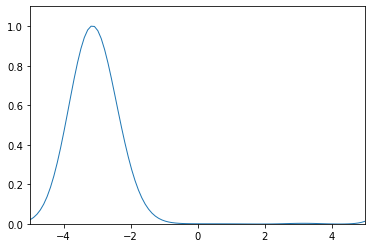

In [370]:
from matplotlib import animation, rc
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -L, L))
ax.set_ylim((0, 1.1))

line, = ax.plot([], [], lw=1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)


# animation function. This is called sequentially
def animate(i):
    x = x = np.linspace(-L,L,int(n))
    y = q[:,i]
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=False)
anim.save('animation.gif', writer='imagemagick', fps=60)
Image(url='animation.gif')